In [35]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [36]:
# Cargar los datos
data = pd.read_csv("/content/data_proyecto.csv")

In [37]:
# Renombrar las columnas para que tengan nombres más descriptivos
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary']

In [38]:
# Mostrar información básica sobre el dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       48841 non-null  object
 2   fnlwgt          48841 non-null  int64 
 3   education       48841 non-null  object
 4   education-num   48841 non-null  int64 
 5   marital-status  48841 non-null  object
 6   occupation      48841 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   sex             48841 non-null  object
 10  capital-gain    48841 non-null  int64 
 11  capital-loss    48841 non-null  int64 
 12  hours-per-week  48841 non-null  int64 
 13  country         48841 non-null  object
 14  salary          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [39]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48841.000000,4.884100e+04,48841.000000,48841.000000,48841.000000,48841.000000
mean,38.643578,1.896664e+05,10.078029,1079.045208,87.504105,40.422391
std,13.710650,1.056039e+05,2.570965,7452.093700,403.008483,12.391571
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781470e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376460e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [40]:
data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K


In [41]:
# Comprobar valores nulos
print("\nValores nulos por columna:")

print(data.isna().sum().sort_values())


Valores nulos por columna:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64


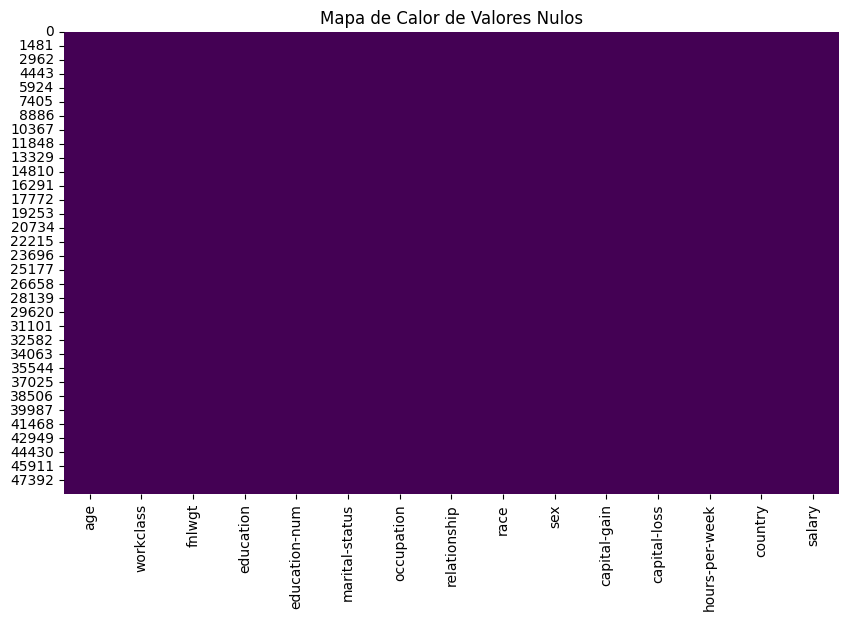

In [42]:
# Visualización de los valores nulos
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos')
plt.show()

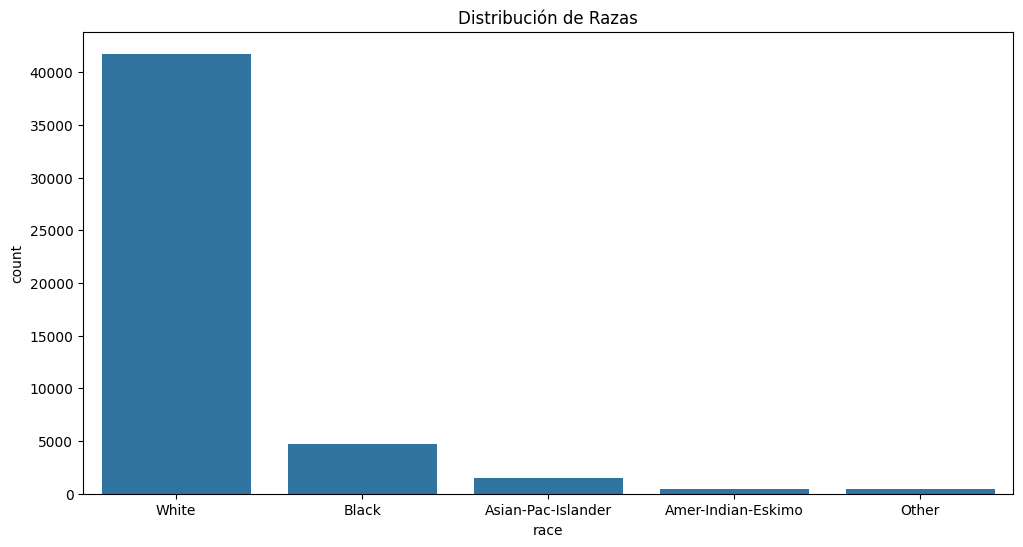

In [43]:
# Visualización de la distribución de la raza en relación al género y al salario
plt.figure(figsize=(12,6))
sns.countplot(x="race", data=data)
plt.title('Distribución de Razas')
plt.show()

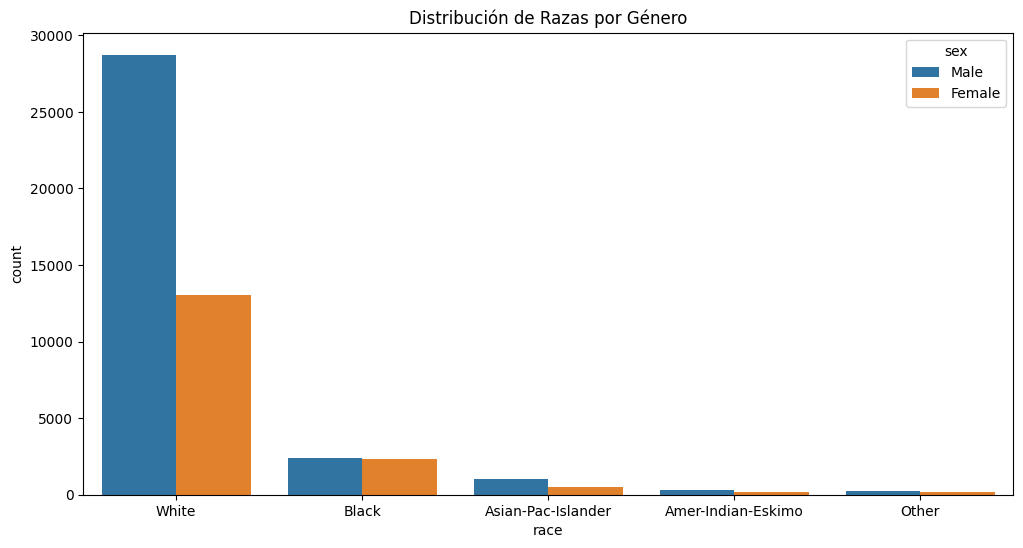

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x="race", data=data, hue="sex")
plt.title('Distribución de Razas por Género')
plt.show()

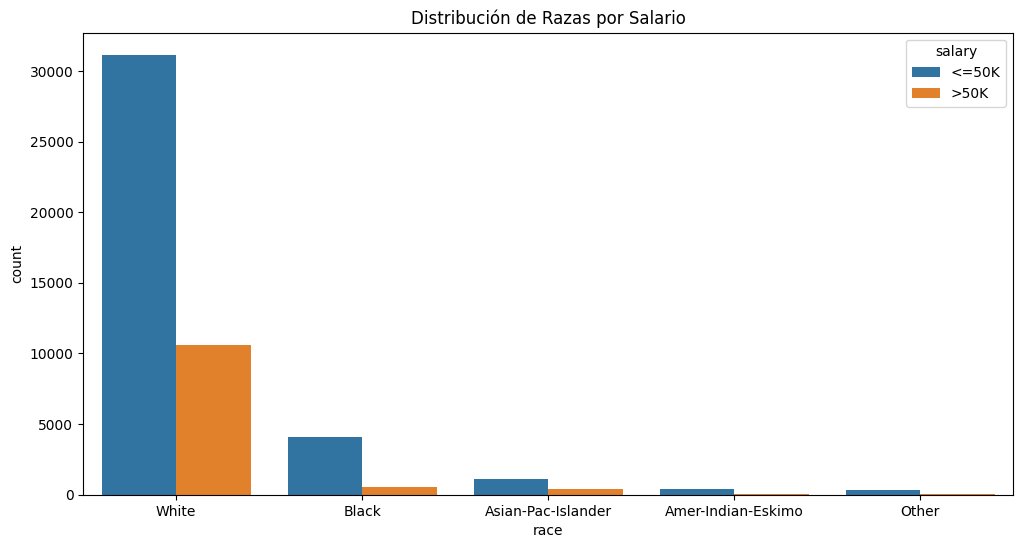

In [45]:
plt.figure(figsize=(12,6))
sns.countplot(x="race", data=data, hue="salary")
plt.title('Distribución de Razas por Salario')
plt.show()

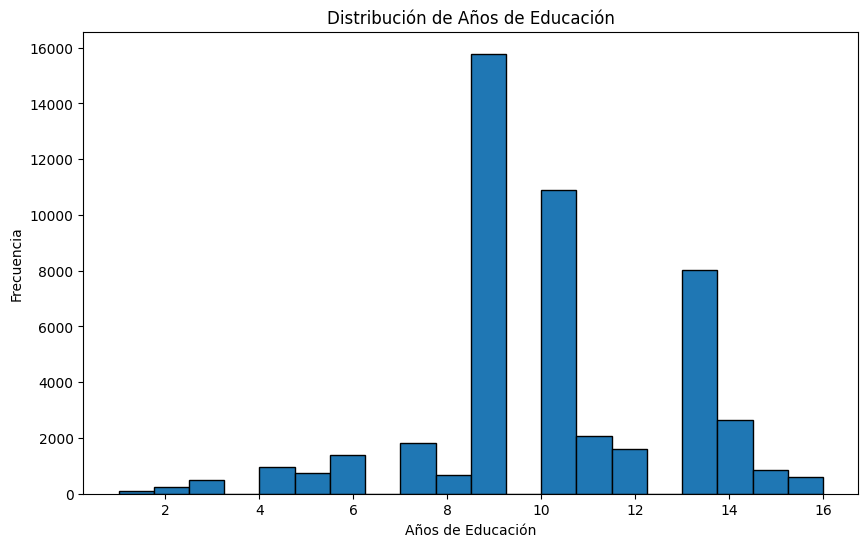

In [46]:
# Visualización de la distribución de "education-num"
plt.figure(figsize=(10,6))
data["education-num"].plot.hist(bins=20, edgecolor='black')
plt.title('Distribución de Años de Educación')
plt.xlabel('Años de Educación')
plt.ylabel('Frecuencia')
plt.show()

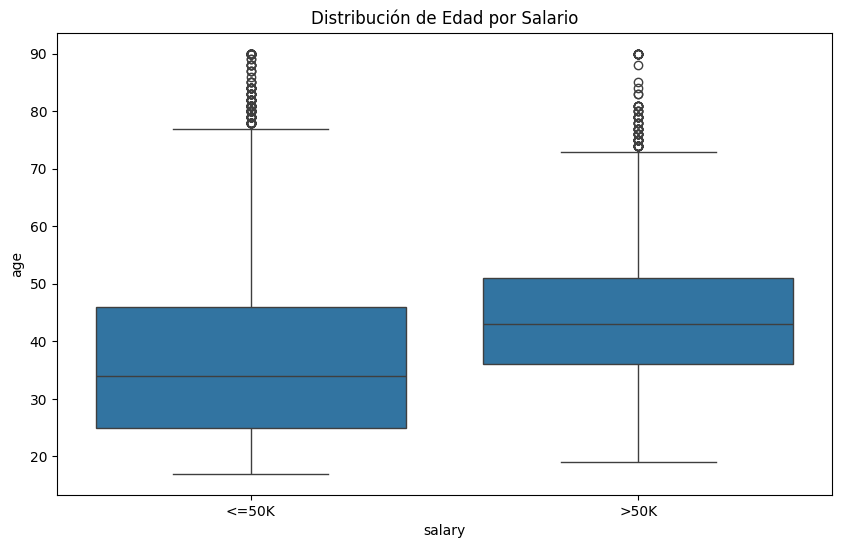

In [47]:
# Visualización de la relación entre edad y salario
plt.figure(figsize=(10,6))
sns.boxplot(x="salary", y="age", data=data)
plt.title('Distribución de Edad por Salario')
plt.show()

In [48]:
# Manejo de valores nulos en la columna 'age'
def calcularEdad(columnas):
    edad = columnas.iloc[0]
    salario = columnas.iloc[1]
    if pd.isnull(edad):
        if salario == '>50K':
            return 38
        else:
            return 29
    else:
        return edad

In [49]:
data["age"] = data[["age", "salary"]].apply(calcularEdad, axis=1)

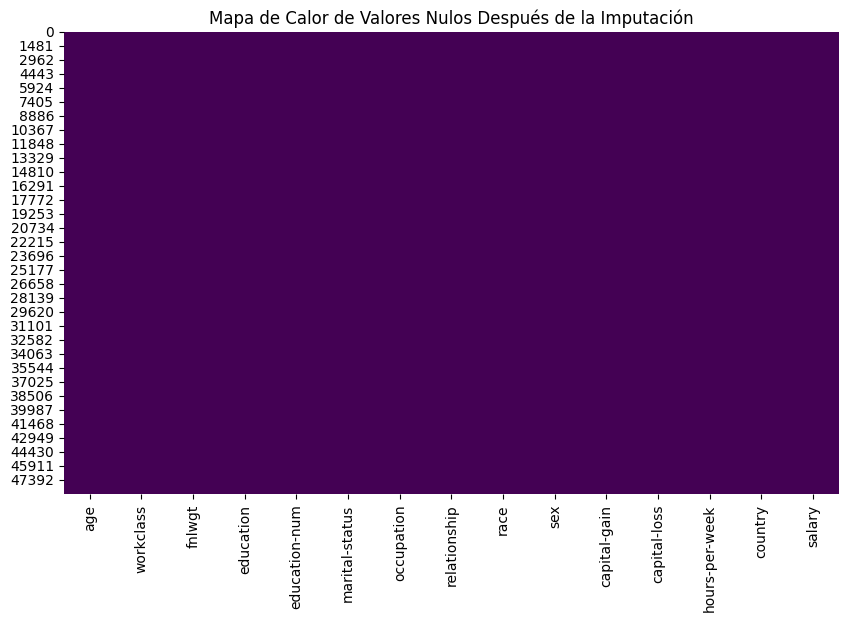

In [50]:
# Verificación de valores nulos después de la imputación
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos Después de la Imputación')
plt.show()

In [51]:
# Eliminar columnas irrelevantes
data.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'country'], axis=1, inplace=True)

In [52]:
# Codificación de variables categóricas
data = pd.get_dummies(data, columns=['race', 'sex'], drop_first=True)

In [53]:
# Convertir la columna objetivo a binaria
data['salary'] = data['salary'].apply(lambda x: 1 if x == '>50K' else 0)

In [55]:
# Mostrar las primeras filas del dataset después de la limpieza
print("\nDataset después de la limpieza y codificación:")
data.head()


Dataset después de la limpieza y codificación:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male
0,50,83311,13,0,0,13,0,False,False,False,True,True
1,38,215646,9,0,0,40,0,False,False,False,True,True
2,53,234721,7,0,0,40,0,False,True,False,False,True
3,28,338409,13,0,0,40,0,False,True,False,False,False
4,37,284582,14,0,0,40,0,False,False,False,True,False


In [56]:
# Separar características y variable objetivo
X = data.drop('salary', axis=1).values
y = data['salary'].values

In [57]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
# Construir el modelo de red neuronal multicapa
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")
])

In [60]:
# Compilar el modelo
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [61]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.2)

Epoch 1/1000
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8084 - loss: 0.4239 - val_accuracy: 0.8216 - val_loss: 0.3816
Epoch 2/1000
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8343 - loss: 0.3665 - val_accuracy: 0.8255 - val_loss: 0.3806
Epoch 3/1000
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8322 - loss: 0.3678 - val_accuracy: 0.8276 - val_loss: 0.3789
Epoch 4/1000
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8334 - loss: 0.3665 - val_accuracy: 0.8248 - val_loss: 0.3797
Epoch 5/1000
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8363 - loss: 0.3591 - val_accuracy: 0.8264 - val_loss: 0.3780
Epoch 6/1000
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8317 - loss: 0.3658 - val_accuracy: 0.8267 - val_loss: 0.3781
Epoch 7/1000
977/977 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8357 - loss: 0.3592 - val_accuracy: 0.8285 - val_loss: 0.3774
Epoch 8/1000
977/977 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8368 - loss: 0.3580 - 

In [62]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8171 - loss: 0.5570
Test Accuracy: 0.8137


In [63]:
# Predicción y evaluación
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

306/306 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      7464
           1       0.64      0.48      0.55      2305

    accuracy                           0.81      9769
   macro avg       0.75      0.70      0.72      9769
weighted avg       0.80      0.81      0.80      9769



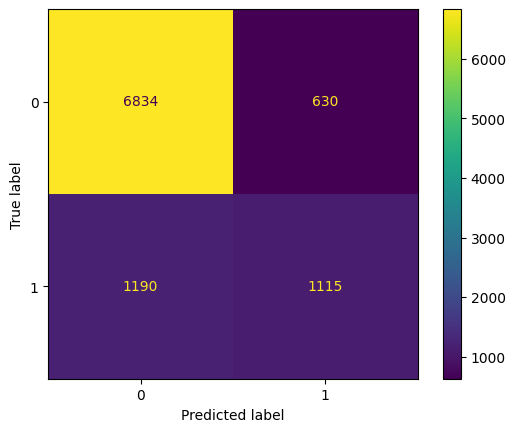

In [64]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()

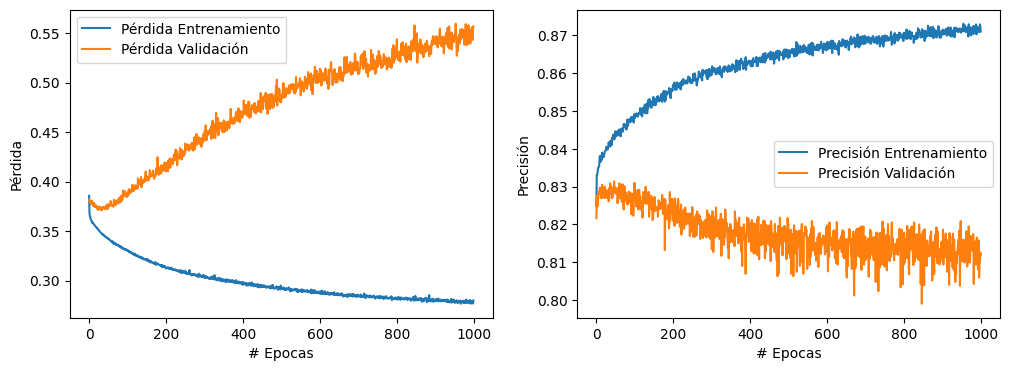

In [65]:
# Graficar la pérdida y precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida Validación')
plt.xlabel('# Epocas')
plt.ylabel('Pérdida')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión Validación')
plt.xlabel('# Epocas')
plt.ylabel('Precisión')
plt.legend()

plt.show()